# Important Details

# 📊 Dataset Information

**Note:** The dataset for this project is **not included in this repository** to keep the repository lightweight.  

You can download the dataset from **Kaggle** using the link below:  

[Download the Demon Slayer Character Dataset](https://www.kaggle.com/datasets/lukhilaksh/demon-slayer-dataset)  

Please make sure to place the downloaded CSV file in the same directory as this notebook before running any code.


# Import Librarys

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import CSV file

In [2]:
df = pd.read_csv('../Datasets/Demon Slayer.csv')
df

,Character_ID,Name,Alias,Status,Gender,Age,Height,Weight,Race,Affiliation,...,Weapon,Special_Abilities,First_Appearance,Last_Appearance,Allies,Enemies,Personality,Voice_Actor_Japanese,Voice_Actor_English,Role
0,1,Tanjiro Kamado,Child of Brightness,Alive,Male,15,165 cm,61 kg,Human,Demon Slayer Corps,...,Nichirin Sword,"Enhanced smell,Demon Slayer Mark,Adaptive figh...",Manga Chapter 1,NaN,"Nezuko Kamado,Zenitsu Agatsuma,Inosuke Hashibi...","Muzan Kibutsuji,Demons","Kind,Empathetic,Determined",Natsuki Hanae,Zach Aguilar,Protagonist
1,2,Nezuko Kamado,NaN,Alive,Female,14,153 cm,45 kg,Hybrid,Demon Slayer Corps,...,NaN,NaN,Manga Chapter 1,NaN,"Tanjiro Kamado, Zenitsu Agatsuma, Inosuke Hash...","Muzan Kibutsuji, Demons","Protective, Compassionate, Strong-willed",Akari Kito,Abby Trott,Deuteragonist
2,3,Zenitsu Agatsuma,NaN,Alive,Male,16,164 cm,53 kg,Human,Demon Slayer Corps,...,Nichirin Sword,"Super hearing, Enhanced speed and reflexes, Li...",Manga Chapter 1,NaN,"Tanjiro Kamado, Nezuko Kamado, Inosuke Hashibira",Demons,"Cowardly, Timid, Loyal, Compassionate",Hiro Shimono,Aleks Le,Tertiary Protagonist
3,4,Inosuke Hashibira,NaN,Alive,Male,15,165 cm,55 kg,Human,Demon Slayer Corps,...,Dual Nichirin Swords,"Enhanced smell, Superhuman strength and agilit...",Manga Chapter 1,NaN,"Tanjiro Kamado, Nezuko Kamado, Zenitsu Agatsuma",Demons,"Hot-headed, Reckless, Brave, Loyal",Yoshitsugu Matsuoka,Bryce Papenbrook,Tertiary Protagonist
4,5,Kanao Tsuyuri,NaN,Alive,Female,16,158 cm,45 kg,Human,Demon Slayer Corps,...,Nichirin Sword,"Enhanced reflexes, Exceptional swordsmanship, ...",Manga Chapter 23,NaN,"Tanjiro Kamado, Nezuko Kamado, Zenitsu Agatsum...",Demons,"Quiet, Observant, Disciplined, Loyal",Nao Toyama,Brianna Knickerbocker,Supporting Protagonist
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,77,Susamaru,NaN,Deceased,Female,NaN,160 cm,48 kg,Demon,NaN,...,NaN,"Superhuman strength, Ball throwing attacks",Manga Chapter 57,Manga Chapter 57,"Enmu, Other Lower-Rank Demons",Demon Slayer Corps,"Aggressive, Playful, Loyal to Muzan",NaN,NaN,Antagonist
77,78,Spider Mother,NaN,Deceased,Female,NaN,180 cm,70 kg,Demon,NaN,...,NaN,"Web manipulation, Superhuman strength",Manga Chapter 80,Manga Chapter 84,Spider Demon Family,Demon Slayer Corps,"Manipulative, Cruel, Obsessive",NaN,NaN,Antagonist
78,79,Spider Father,NaN,Deceased,Male,NaN,190 cm,80 kg,Demon,NaN,...,NaN,"Web manipulation, Superhuman strength",Manga Chapter 80,Manga Chapter 84,Spider Demon Family,Demon Slayer Corps,"Manipulative, Cruel, Obsessive",NaN,NaN,Antagonist
79,80,Spider Sister,NaN,Deceased,Female,NaN,170 cm,55 kg,Demon,NaN,...,NaN,"Web manipulation, Agility, Superhuman strength",Manga Chapter 80,Manga Chapter 84,Spider Demon Family,Demon Slayer Corps,"Cruel, Cunning, Loyal to Spider Father",NaN,NaN,Antagonist


# Preprocessing

### Remove " cm" from Height and " kg" from Weight

In [3]:
df['Height'] = df['Height'].str.replace(' cm','').astype(float)
df['Weight'] = df['Weight'].str.replace(' kg','').astype(float)

### fills missing numeric ages with the median Height

In [4]:
df['Height'] = df['Height'].fillna(df['Height'].median())
df['Weight'] = df['Weight'].fillna(df['Weight'].median())

### Single column replacement

In [5]:
df['Alias'] = df['Alias'].fillna('None')

### Multiple column replacement

In [6]:
df[['Affiliation', 'Family', 'Mentor', 'Rank', 'Breathing_Style', 'Weapon', 'Special_Abilities', 'Last_Appearance', 'Allies', 'Enemies', 'Voice_Actor_Japanese', 'Voice_Actor_English', 'Role']] = df[['Affiliation', 'Family', 'Mentor', 'Rank', 'Breathing_Style', 'Weapon', 'Special_Abilities', 'Last_Appearance', 'Allies', 'Enemies', 'Voice_Actor_Japanese', 'Voice_Actor_English', 'Role']].fillna('None')

### Create a new column 'Is_Human' to indicate if the character is human

In [7]:
df['Is_Human'] = df['Race'].str.contains('Human')
df['Is_Human']

0      True
1     False
2      True
3      True
4      True
      ...  
76    False
77    False
78    False
79    False
80    False
Name: Is_Human, Length: 81, dtype: bool

### Find Duplicates and remove them

In [8]:
duplicates = df[df['Name'].duplicated()]
df = df.drop_duplicates(subset='Name', keep='first')

In [9]:
# Cleaned the Race column to keep only "Demon" or "Animal" by removing extra text after them.
import re
df['Race'] = df['Race'].str.replace(r'^(Demon).*', 'Demon', regex=True)
df['Race'] = df['Race'].str.replace(r'^(Animal).*', 'Animal', regex=True)

## Final DATASET

### First Five row

In [10]:
df.head()

,Character_ID,Name,Alias,Status,Gender,Age,Height,Weight,Race,Affiliation,...,Special_Abilities,First_Appearance,Last_Appearance,Allies,Enemies,Personality,Voice_Actor_Japanese,Voice_Actor_English,Role,Is_Human
0,1,Tanjiro Kamado,Child of Brightness,Alive,Male,15,165.0,61.0,Human,Demon Slayer Corps,...,"Enhanced smell,Demon Slayer Mark,Adaptive figh...",Manga Chapter 1,None,"Nezuko Kamado,Zenitsu Agatsuma,Inosuke Hashibi...","Muzan Kibutsuji,Demons","Kind,Empathetic,Determined",Natsuki Hanae,Zach Aguilar,Protagonist,True
1,2,Nezuko Kamado,None,Alive,Female,14,153.0,45.0,Hybrid,Demon Slayer Corps,...,None,Manga Chapter 1,None,"Tanjiro Kamado, Zenitsu Agatsuma, Inosuke Hash...","Muzan Kibutsuji, Demons","Protective, Compassionate, Strong-willed",Akari Kito,Abby Trott,Deuteragonist,False
2,3,Zenitsu Agatsuma,None,Alive,Male,16,164.0,53.0,Human,Demon Slayer Corps,...,"Super hearing, Enhanced speed and reflexes, Li...",Manga Chapter 1,None,"Tanjiro Kamado, Nezuko Kamado, Inosuke Hashibira",Demons,"Cowardly, Timid, Loyal, Compassionate",Hiro Shimono,Aleks Le,Tertiary Protagonist,True
3,4,Inosuke Hashibira,None,Alive,Male,15,165.0,55.0,Human,Demon Slayer Corps,...,"Enhanced smell, Superhuman strength and agilit...",Manga Chapter 1,None,"Tanjiro Kamado, Nezuko Kamado, Zenitsu Agatsuma",Demons,"Hot-headed, Reckless, Brave, Loyal",Yoshitsugu Matsuoka,Bryce Papenbrook,Tertiary Protagonist,True
4,5,Kanao Tsuyuri,None,Alive,Female,16,158.0,45.0,Human,Demon Slayer Corps,...,"Enhanced reflexes, Exceptional swordsmanship, ...",Manga Chapter 23,None,"Tanjiro Kamado, Nezuko Kamado, Zenitsu Agatsum...",Demons,"Quiet, Observant, Disciplined, Loyal",Nao Toyama,Brianna Knickerbocker,Supporting Protagonist,True


### Last Five row

In [11]:
df.tail()

,Character_ID,Name,Alias,Status,Gender,Age,Height,Weight,Race,Affiliation,...,Special_Abilities,First_Appearance,Last_Appearance,Allies,Enemies,Personality,Voice_Actor_Japanese,Voice_Actor_English,Role,Is_Human
76,77,Susamaru,None,Deceased,Female,NaN,160.0,48.0,Demon,None,...,"Superhuman strength, Ball throwing attacks",Manga Chapter 57,Manga Chapter 57,"Enmu, Other Lower-Rank Demons",Demon Slayer Corps,"Aggressive, Playful, Loyal to Muzan",None,None,Antagonist,False
77,78,Spider Mother,None,Deceased,Female,NaN,180.0,70.0,Demon,None,...,"Web manipulation, Superhuman strength",Manga Chapter 80,Manga Chapter 84,Spider Demon Family,Demon Slayer Corps,"Manipulative, Cruel, Obsessive",None,None,Antagonist,False
78,79,Spider Father,None,Deceased,Male,NaN,190.0,80.0,Demon,None,...,"Web manipulation, Superhuman strength",Manga Chapter 80,Manga Chapter 84,Spider Demon Family,Demon Slayer Corps,"Manipulative, Cruel, Obsessive",None,None,Antagonist,False
79,80,Spider Sister,None,Deceased,Female,NaN,170.0,55.0,Demon,None,...,"Web manipulation, Agility, Superhuman strength",Manga Chapter 80,Manga Chapter 84,Spider Demon Family,Demon Slayer Corps,"Cruel, Cunning, Loyal to Spider Father",None,None,Antagonist,False
80,81,Spider Brother,None,Deceased,Male,NaN,185.0,75.0,Demon,None,...,"Web manipulation, Agility, Superhuman strength",Manga Chapter 80,Manga Chapter 84,Spider Demon Family,Demon Slayer Corps,"Cruel, Loyal, Cunning",None,None,Antagonist,False


# EDA

## univariate

### 1. How many characters are Alive vs Deceased?

✅ Count of characters by Status:
Status
Deceased    41
Alive       40
Name: count, dtype: int64


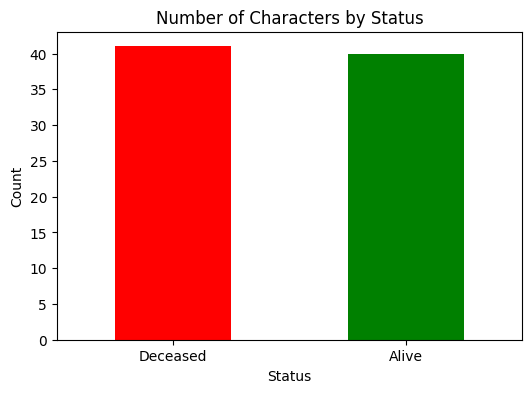

In [12]:
status_counts = df['Status'].value_counts()

# Print counts
print("✅ Count of characters by Status:")
print(status_counts)

plt.figure(figsize=(6,4))
status_counts.plot(kind='bar', color=['red', 'green'])
plt.title('Number of Characters by Status')
plt.xlabel('Status')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

### 2. Count of characters by Gender (Male, Female)

Gender
Male      56
Female    25
Name: count, dtype: int64


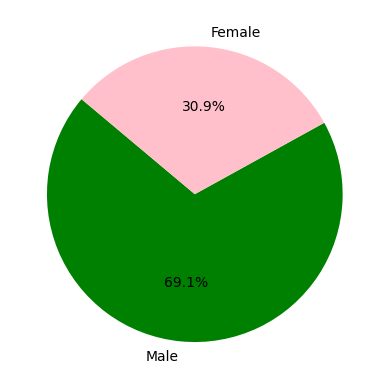

In [13]:
gender_counts = df['Gender'].value_counts()
print(gender_counts)

plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=['green', 'pink'])
plt.show()

### Count of characters by Race (Human, Demon, Hybrid)

Race
Human     59
Demon     20
Hybrid     1
Animal     1
Name: count, dtype: int64


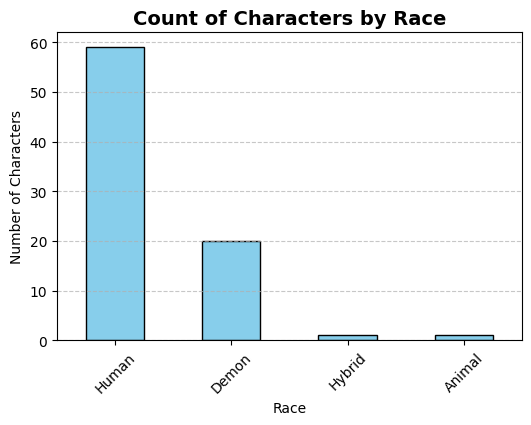

In [14]:
race_count = df['Race'].value_counts()
print(race_count)

plt.figure(figsize=(6,4))
race_count.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Count of Characters by Race", fontsize=14, weight='bold')
plt.xlabel("Race")
plt.ylabel("Number of Characters")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()